In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [167]:
df = pd.read_csv("/content/housing.csv")

#Data Cleaning

In [168]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [169]:
#check size
df.shape

(546, 12)

In [170]:
#checking null values
df.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [171]:
#checking dtypes
df.dtypes

price        int64
lotsize      int64
bedrooms     int64
bathrms      int64
stories      int64
driveway    object
recroom     object
fullbase    object
gashw       object
airco       object
garagepl     int64
prefarea    object
dtype: object

to predict in linear regression all values should be in int values
so have to convert categorical into ints

In [172]:
df.nunique()

price       219
lotsize     284
bedrooms      6
bathrms       4
stories       4
driveway      2
recroom       2
fullbase      2
gashw         2
airco         2
garagepl      4
prefarea      2
dtype: int64

In [173]:
categorical_cols = ['driveway',
'recroom',
'fullbase',
'gashw',
'airco',
'prefarea']


for i in categorical_cols:
  for ind, row in enumerate(df[i]):
    if row == 'yes':
      df[i][ind] = 1
    elif row == 'no':
      df[i][ind] = 0




Streaming output truncated to the last 5000 lines.
<ipython-input-173-307ba588009a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][ind] = 1
<ipython-input-173-307ba588009a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][ind] = 1
<ipython-input-173-307ba588009a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][ind] = 1
<ipython-input-173-307ba588009a>:14: SettingWithCopyWarning: 
A value is trying to be set on a

In [174]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [175]:
df.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

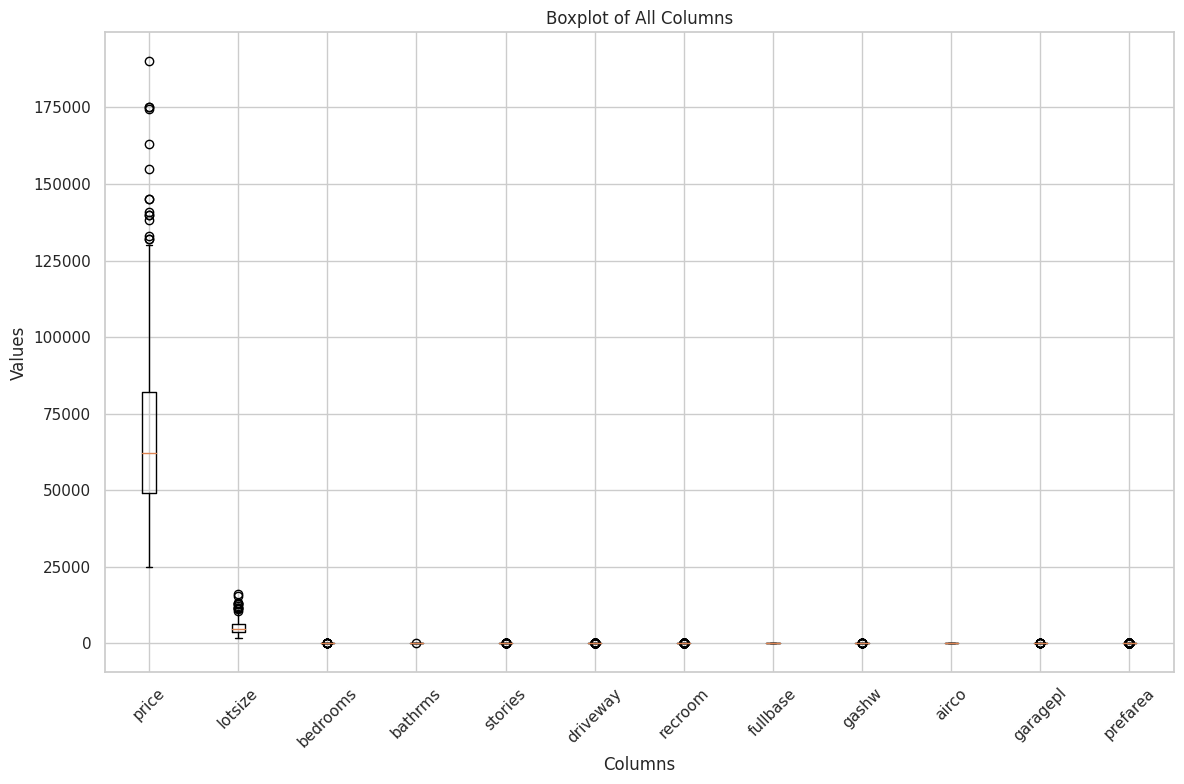

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing your data
# Replace 'df' with the name of your DataFrame

# Create a boxplot for each column
plt.figure(figsize=(12, 8))  # Set the figure size

# Calculate the number of columns for better spacing
num_columns = len(df.columns)

# Loop through each column and create a boxplot
for i, column in enumerate(df.columns):
    plt.boxplot(df[column], positions=[i])  # Set the x-coordinate to 'i' for each boxplot
    plt.xticks(range(num_columns), df.columns, rotation=45)  # Set x-axis labels

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of All Columns')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [177]:
#scale them all to

so there were only two type of values in the data yes or no and we replaced them all


so now to implement linear regression

we first need to define the equation
the assignment said multiple variables,
what i want to do is
implement one to n variables and show both train and test
accuracy as we increaase the variables



In [178]:
data = pd.read_csv("housing.csv")

In [179]:
categorical_cols = ['driveway',
'recroom',
'fullbase',
'gashw',
'airco',
'prefarea']


for i in categorical_cols:
  for ind, row in enumerate(data[i]):
    if row == 'yes':
      data[i][ind] = 1
    elif row == 'no':
      data[i][ind] = 0




Streaming output truncated to the last 5000 lines.
<ipython-input-179-c946ebe79ddb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][ind] = 1
<ipython-input-179-c946ebe79ddb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][ind] = 1
<ipython-input-179-c946ebe79ddb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][ind] = 1
<ipython-input-179-c946ebe79ddb>:14: SettingWithCopyWarning: 
A value is trying to be se

In [180]:
for i in categorical_cols:
  data[i] = data[i].astype('int')

In [181]:
data.dtypes

price       int64
lotsize     int64
bedrooms    int64
bathrms     int64
stories     int64
driveway    int64
recroom     int64
fullbase    int64
gashw       int64
airco       int64
garagepl    int64
prefarea    int64
dtype: object

In [182]:
#min max because there are only zero and one values in the categorical values and
#otheres will be in range -1,1 if we use normal distribution,
#it would be best if we do all in the range of 0,1 with min max since categorical are already in 0,1


In [183]:
#scaling
df_scaled = df.copy()
for column in df.columns:
  if column == "price":
    continue
  mini = df[column].min()
  maxi = df[column].max()
  df_scaled[column] = (df[column] - mini) / (maxi - mini)



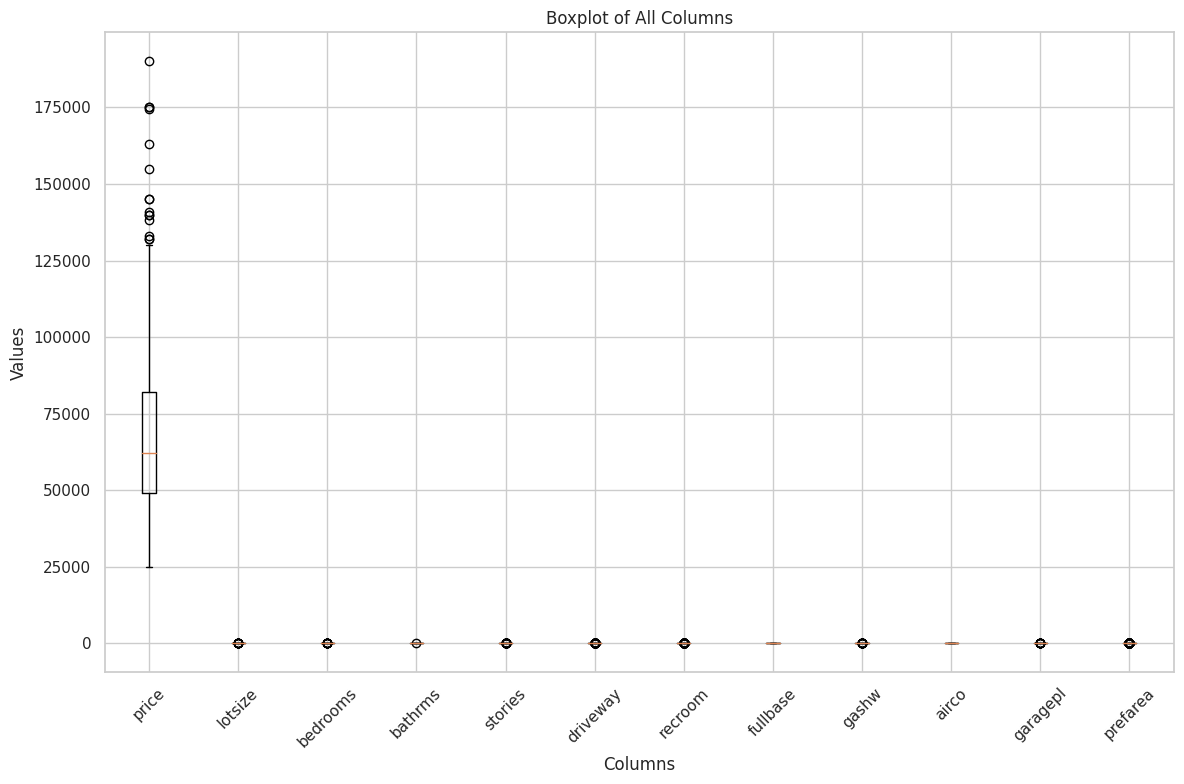

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 8))
num_columns = len(df_scaled.columns)

for i, column in enumerate(df_scaled.columns):
    plt.boxplot(df_scaled[column], positions=[i])
    plt.xticks(range(num_columns), df_scaled.columns, rotation=45)

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of All Columns')

plt.tight_layout()
plt.show()


Source for linear regression matrix multiplication

#Linear Regression From Scratch

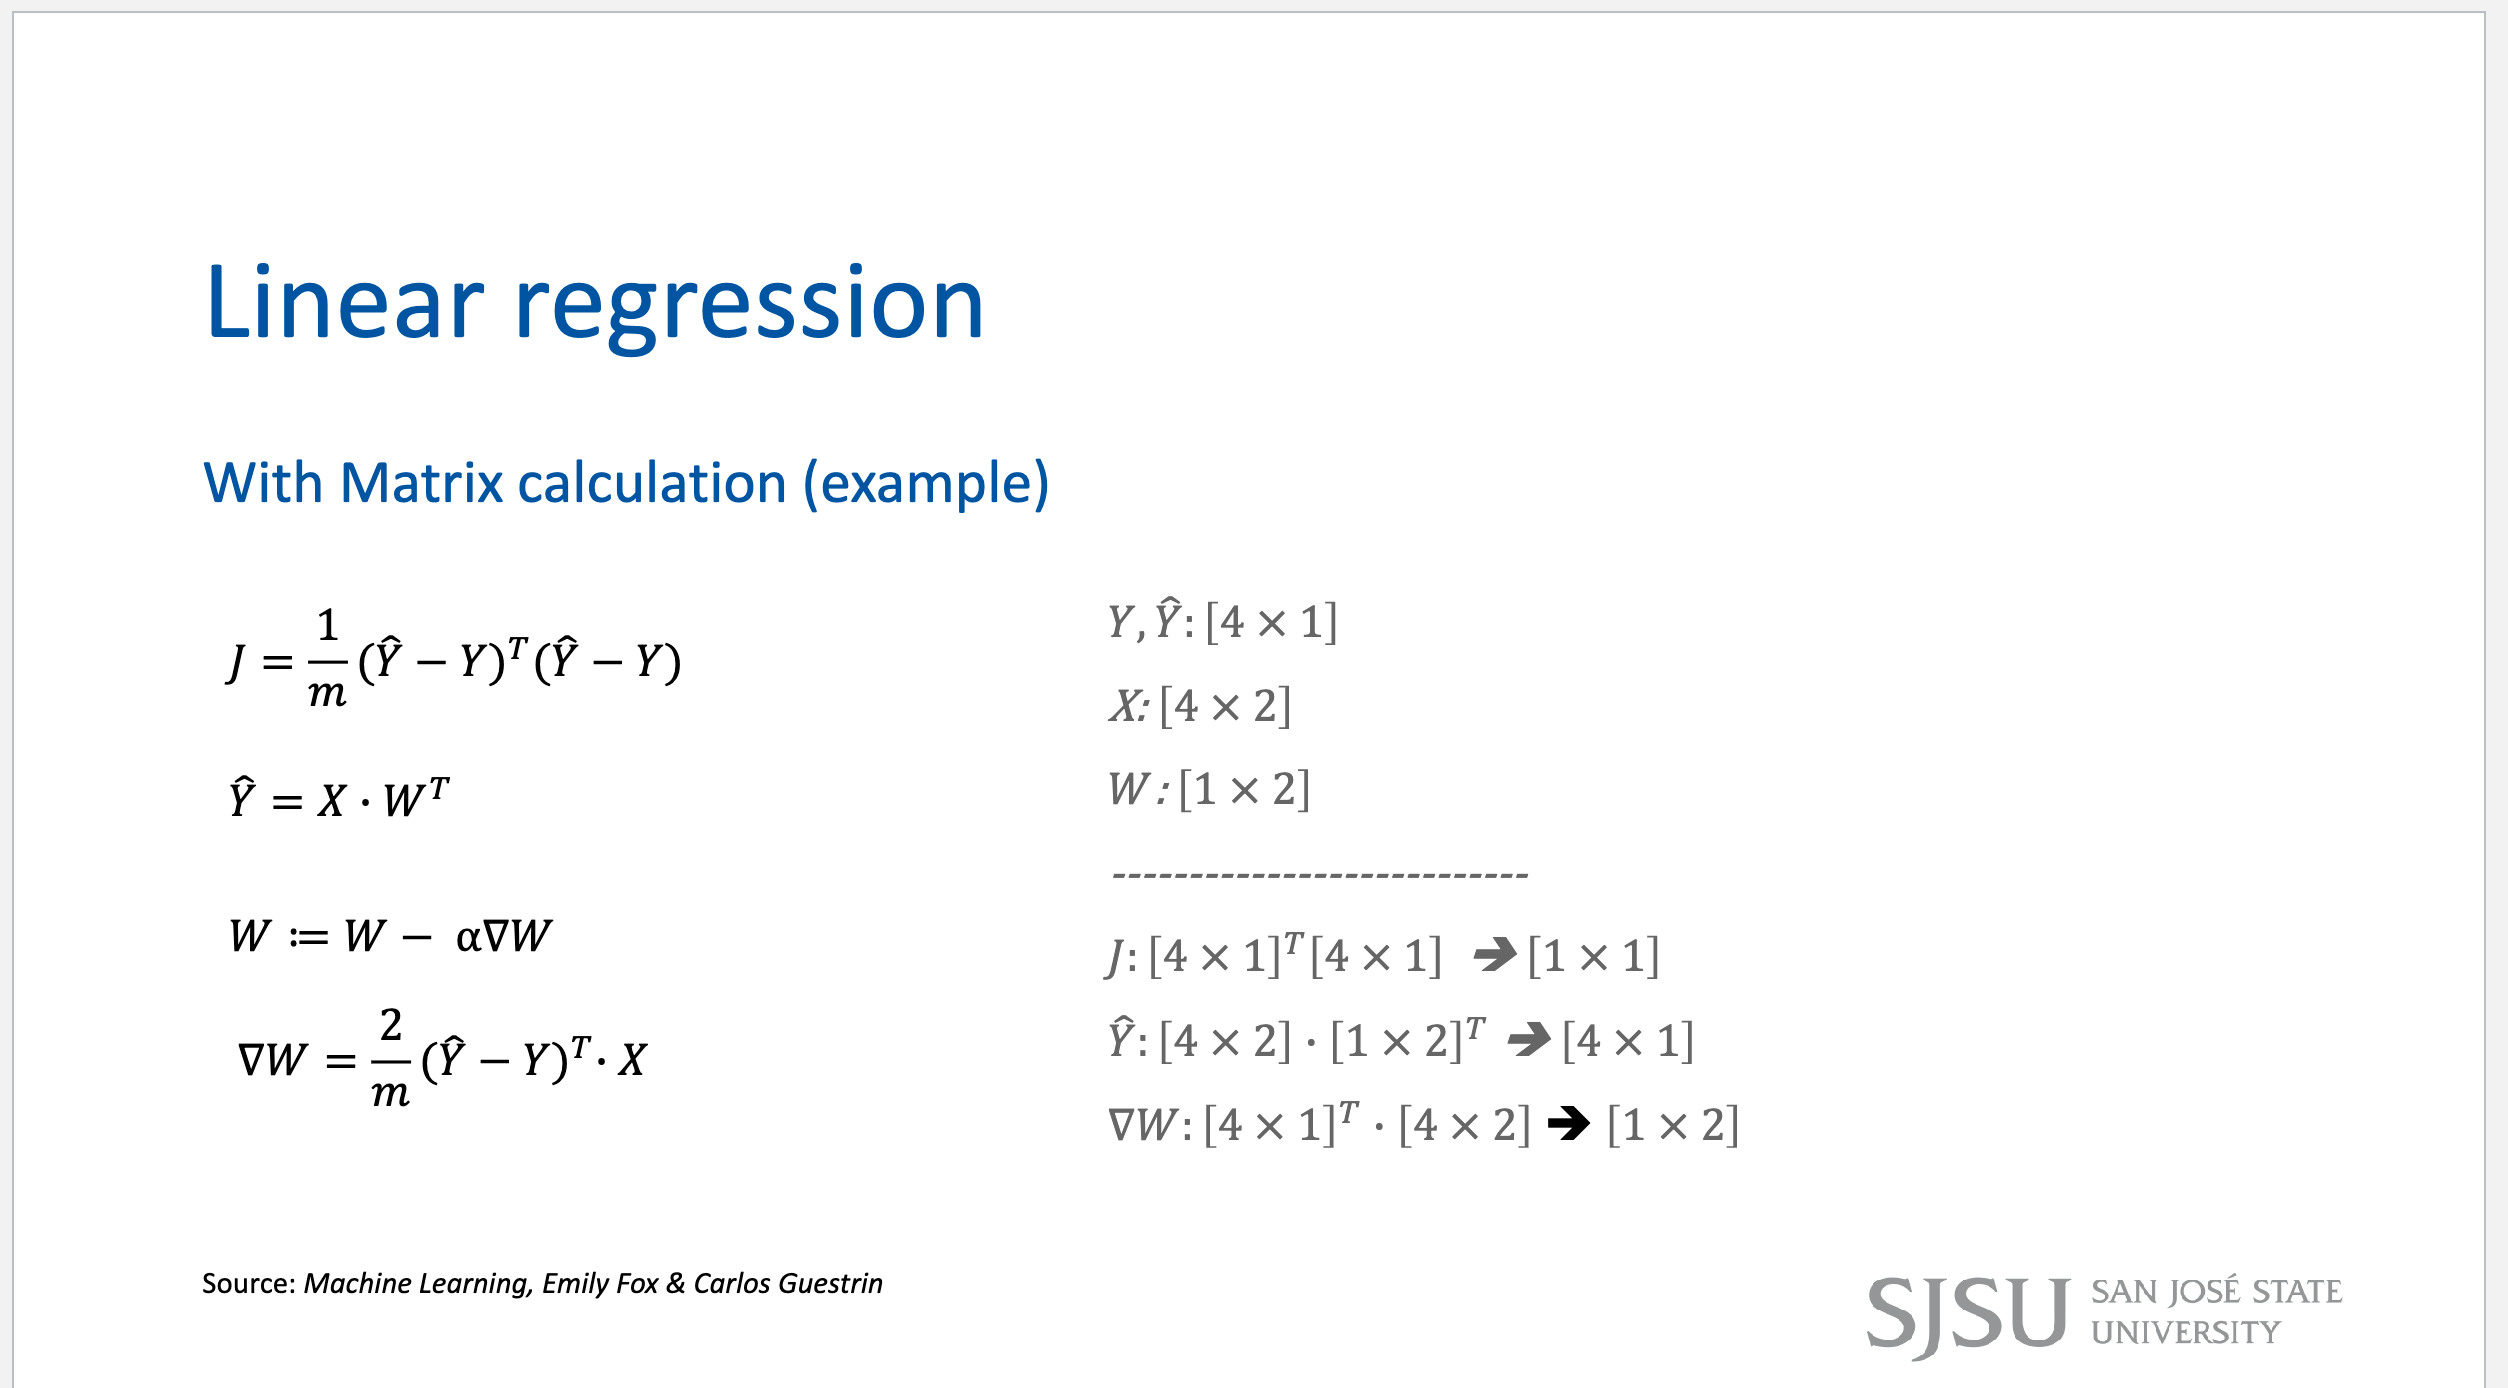

In [185]:
X = df_scaled.drop('price', axis = 1)
y = df_scaled['price']

In [186]:
X.head(), y.head()

(    lotsize  bedrooms  bathrms   stories driveway recroom fullbase gashw  \
 0  0.288660       0.4      0.0  0.333333      1.0     0.0      1.0   0.0   
 1  0.161512       0.2      0.0  0.000000      1.0     0.0      0.0   0.0   
 2  0.096907       0.4      0.0  0.000000      1.0     0.0      0.0   0.0   
 3  0.343643       0.4      0.0  0.333333      1.0     1.0      0.0   0.0   
 4  0.323711       0.2      0.0  0.000000      1.0     0.0      0.0   0.0   
 
   airco  garagepl prefarea  
 0   0.0  0.333333      0.0  
 1   0.0  0.000000      0.0  
 2   0.0  0.000000      0.0  
 3   0.0  0.000000      0.0  
 4   0.0  0.000000      0.0  ,
 0    42000
 1    38500
 2    49500
 3    60500
 4    61000
 Name: price, dtype: int64)

In [187]:
X.shape, y.shape

((546, 11), (546,))

In [188]:
np.random.seed(0)

In [189]:
#so i need to add another column for bias variable x0 , and weight would be len = 12

X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
weights = np.random.rand(1, X_with_bias.shape[1])


X_with_bias.shape, weights.shape


((546, 12), (1, 12))

In [190]:
weights

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
        0.79172504, 0.52889492]])

In [191]:
def gradient_descent(X,y, weights, alpha = 0.05, max_iterations = 1000):
  rmse = []
  prev_cost = math.inf
  for i in range(max_iterations):

    y_cap = X.dot(weights.T)
    cost = np.mean((y_cap - y)**2)
    rmse.append(np.sqrt(np.mean((y_cap - y) ** 2)))
    if abs(prev_cost - cost) < 1e-4:
      print("convergence reached. breaking out of loop")
      break

    #m = len of samples
    m = X.shape[0]
    delta_weights = (2/m)*((y_cap-y).T.dot(X))
    #alpha = 0.01 #learing rate
    weights = weights - alpha*delta_weights
    prev_cost = cost

  return weights ,rmse


In [192]:
X_with_bias.shape

(546, 12)

In [193]:
optimal_weights ,rmse = gradient_descent(X_with_bias, y.values.reshape(-1, 1), weights)

In [194]:
print("optimal weights of linear regression fit is", optimal_weights)
print("RMSE of linear regresssion of gradient descent final is ") ,rmse[-1]

optimal weights of linear regression fit is [[23946.53589091277 43824.12797154985 13450.715975583373
  39756.46770023599 19349.471161672674 7418.155051410448
  4910.049782678742 5232.623036043717 12815.08187660625 12988.0742454105
  14231.97579668827 9761.677915381171]]
RMSE of linear regresssion of gradient descent final is 


(None, 15301.27411084123)

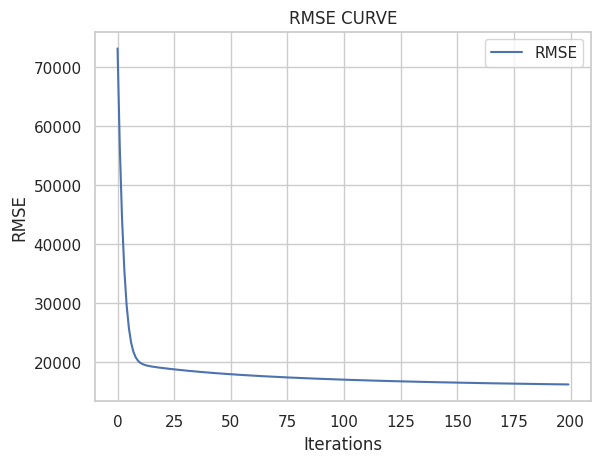

In [195]:
import matplotlib.pyplot as plt

plt.plot(rmse[:200], label='RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('RMSE CURVE')
plt.legend()
plt.grid(True)
plt.show()


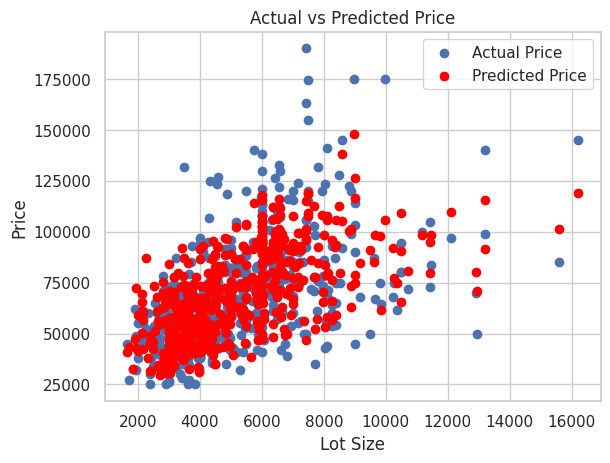

In [196]:
import matplotlib.pyplot as plt

# Calculate predicted values
y_cap = X_with_bias.dot(optimal_weights.T)

plt.scatter(df['lotsize'], y, label='Actual Price')
plt.scatter(df['lotsize'], y_cap, color='red', label='Predicted Price')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()


In [197]:
y

0       42000
1       38500
2       49500
3       60500
4       61000
        ...  
541     91500
542     94000
543    103000
544    105000
545    105000
Name: price, Length: 546, dtype: int64

In [198]:
from sklearn.metrics import r2_score

# calculate R2 score
r2_score_ = r2_score(y, y_cap)
r2_score_
print("r2 score of true price vs predicted price is :", r2_score_)

r2 score of true price vs predicted price is : 0.6710478109816898


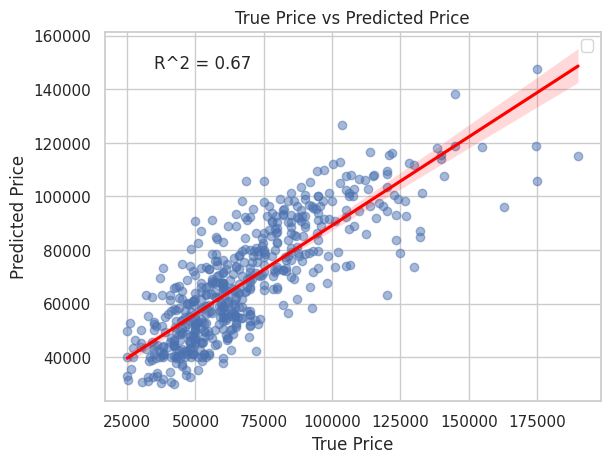

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

reg_plot = sns.regplot(x=y.astype(float), y=y_cap.astype(float), scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.text(0.1, 0.9, f'R^2 = {r2_score_:.2f}', transform=reg_plot.transAxes)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.legend()
plt.show()


#L2 regularization From Scratch

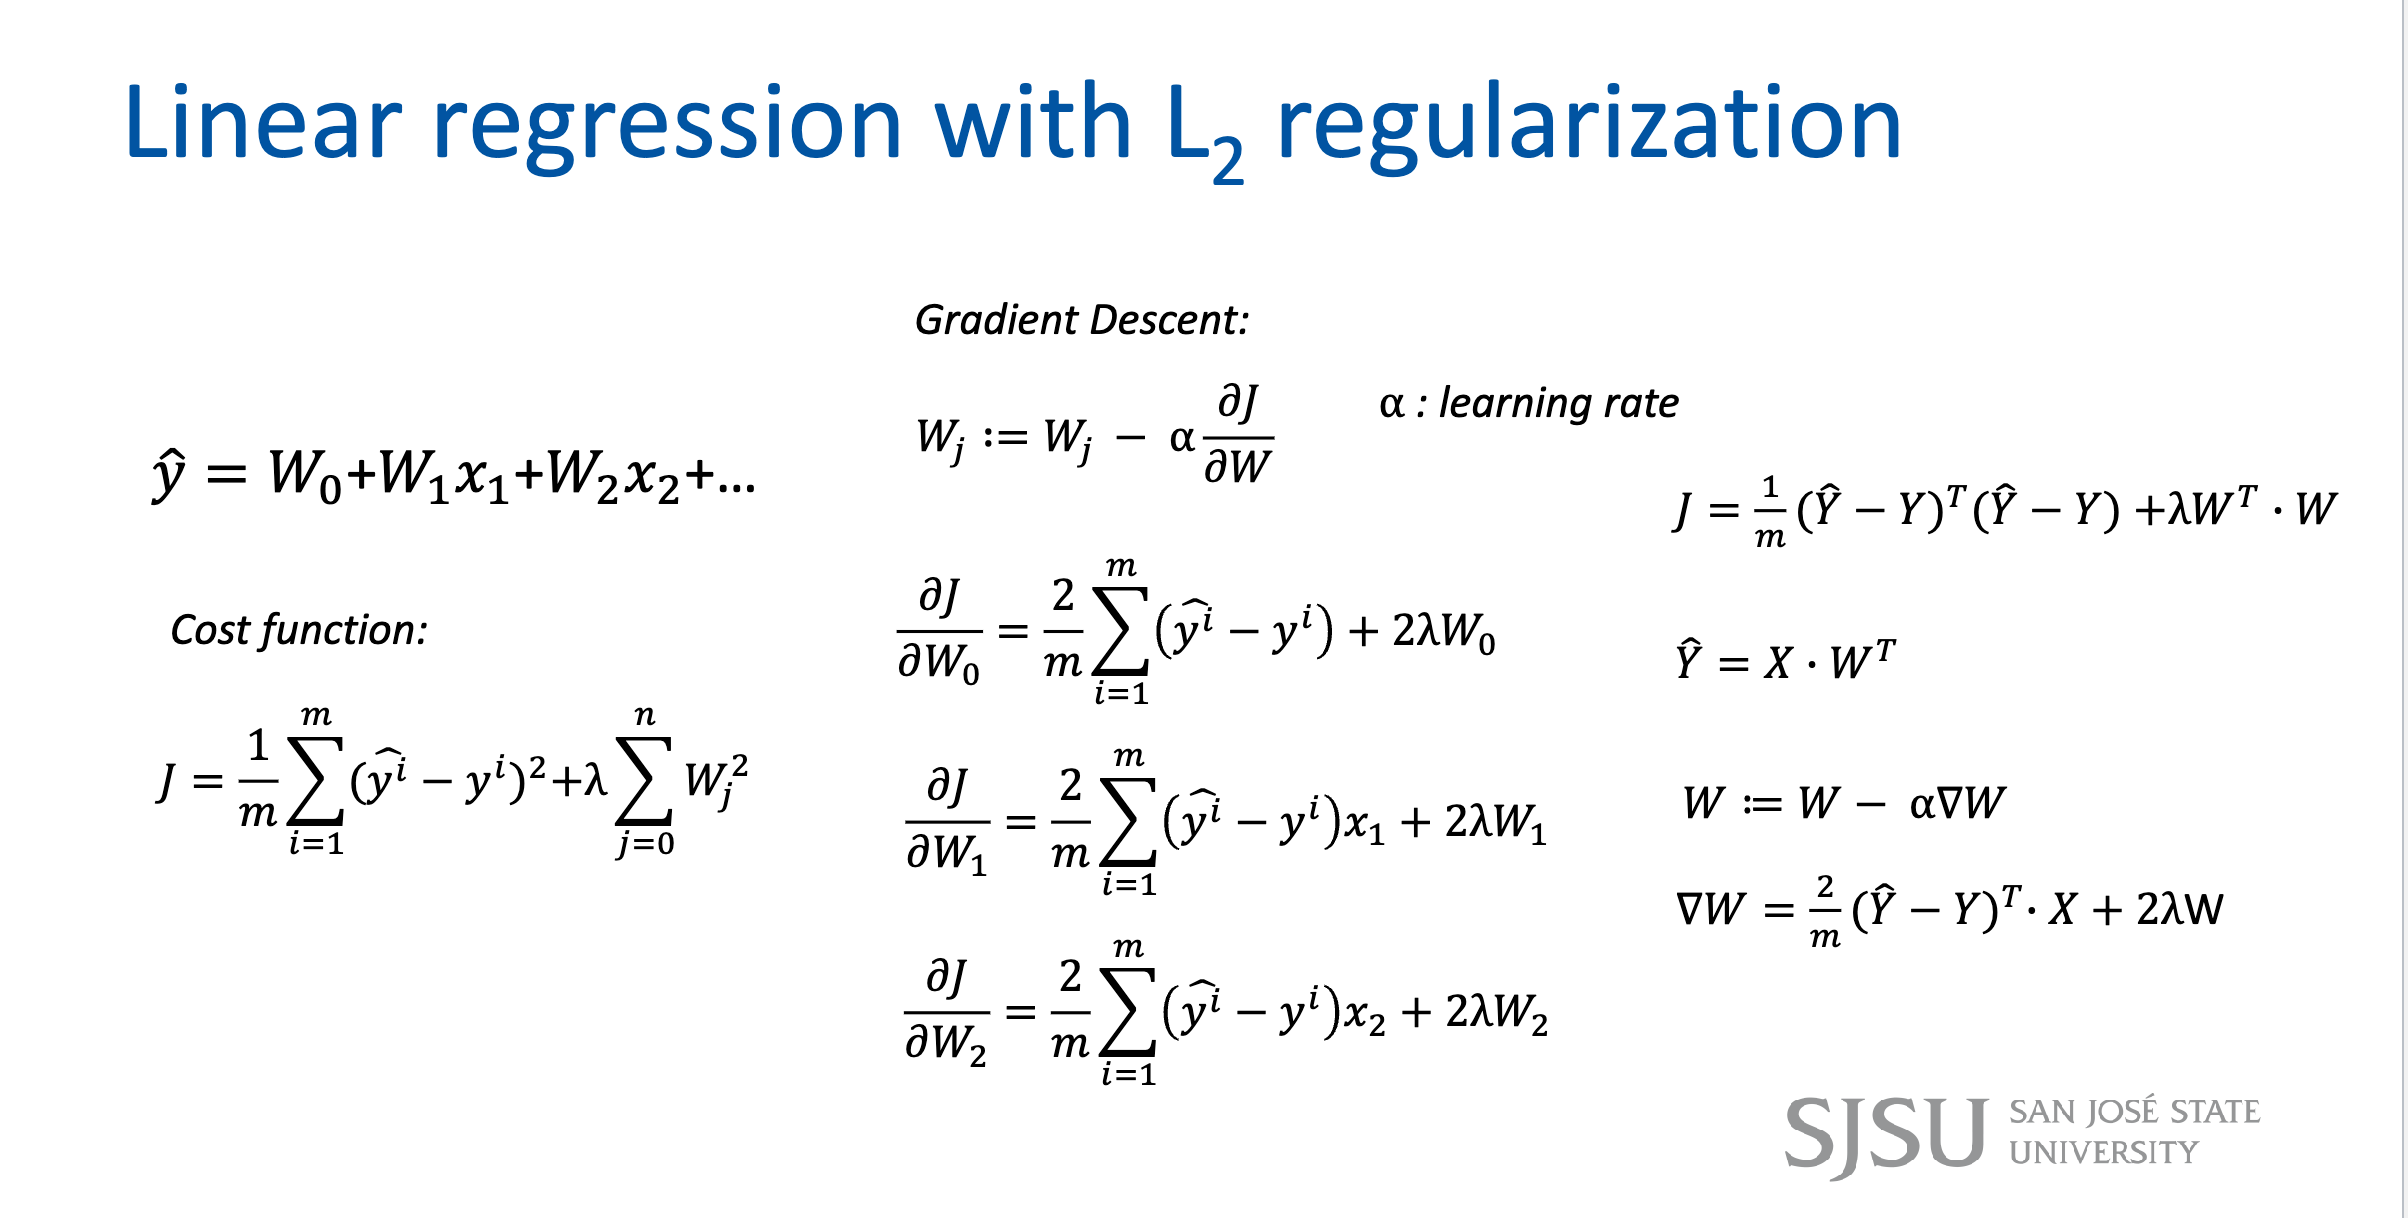

In [200]:
from sklearn.model_selection import train_test_split as sklearn_train_test
#using sklearn only for train test split as professor said it was okay to use it.

def initialization(X,y):
  #only for xtrain and ytrain
  X_with_bias_poly = np.c_[np.ones((X.shape[0], 1)), X, X**2, X**3,X**4,X**5]
  weights_poly = np.random.rand(1, X_with_bias_poly.shape[1])
  return X_with_bias_poly, weights_poly

def train_test_split(X,y):
  X_train, X_test, y_train, y_test = sklearn_train_test(X, y, train_size=0.7, random_state=42)
  return X_train, X_test, y_train, y_test

def gradient_descent_with_poly_l2(X,y, weights,Lambda, alpha = 0.005, max_iterations = 10000):

  rmse = []

  prev_cost = math.inf
  for i in range(max_iterations):

    y_cap = X.dot(weights.T)
    cost = np.sqrt(np.mean((y_cap - y) ** 2))
    rmse.append(np.sqrt(np.mean((y_cap - y) ** 2)))
    if abs(prev_cost - cost) < 1e-4:
      #print("convergence reached. breaking out of loop")
      break

    #m = len of samples

    m = X.shape[0]
    #print('Lambda, weights',Lambda, weights)
    delta_weights = (2/m)*((y_cap-y).T.dot(X)) +  2*Lambda*weights
    #alpha = 0.01 #learing rate
    #print('delta_weights',delta_weights)
    weights = weights - alpha*delta_weights
    prev_cost = cost

  return weights ,rmse

def predict(X_test,y_test, optimal_weights):
  #here the weights are taken of optimal lambda value
  #x is turned into a matrix

  X_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test, X_test**2, X_test**3,X_test**4,X_test**5]
  y_cap = X_with_bias.dot(optimal_weights.T)
  rmse = np.sqrt(np.mean((y_cap - y_test) ** 2))
  return rmse, y_cap




def fit_different_lambdas(X_with_bias_poly,y_train,weights_poly):
  lambda_range = [0,0.00001,0.0001,0.01,0.02,0.03,0.04,0.07,0.09,0.1]
  rmse = []
  weights = []
  for Lambda in lambda_range:
    optimal_weights , temp_rmse = gradient_descent_with_poly_l2(X_with_bias_poly,y_train, weights_poly, Lambda)
    rmse.append(temp_rmse)
    weights.append(optimal_weights)
  return weights, rmse, lambda_range




In [201]:
'''X_testing = X['lotsize'].values
X_testing = X_testing.reshape(-1,1)
X_testing.shape'''

"X_testing = X['lotsize'].values\nX_testing = X_testing.reshape(-1,1)\nX_testing.shape"

In [202]:
#l2 only with lotsize so have to drop all others
X_lotsize = X['lotsize'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_lotsize,y)
X_with_bias_poly, weights_poly = initialization(X_train,y_train)
print(X_with_bias_poly.shape, weights_poly.shape)
weights, rmse , lambda_range = fit_different_lambdas(X_with_bias_poly,y_train.values.reshape(-1, 1),weights_poly)







(382, 6) (1, 6)


In [203]:
plt.figure(figsize=(10, 6))

for i in range(0,10):
  print("lambda value",lambda_range[i]," and RMSE with train data",rmse[i][-1])


lambda value 0  and RMSE with train data 21800.677408315838
lambda value 1e-05  and RMSE with train data 21800.92764906515
lambda value 0.0001  and RMSE with train data 21803.188427575406
lambda value 0.01  and RMSE with train data 22101.39538641379
lambda value 0.02  and RMSE with train data 22410.90022049233
lambda value 0.03  and RMSE with train data 22687.204585101117
lambda value 0.04  and RMSE with train data 22931.77223057863
lambda value 0.07  and RMSE with train data 23556.044499079366
lambda value 0.09  and RMSE with train data 23935.667398720903
lambda value 0.1  and RMSE with train data 24123.26203759947


<Figure size 1000x600 with 0 Axes>

In [204]:
len(weights),len(weights), len(rmse), len(lambda_range)


(10, 10, 10, 10)

In [205]:
weights_matrix = np.vstack(weights)
weights_matrix.T.shape


(6, 10)

[0, 1e-05, 0.0001, 0.01, 0.02, 0.03, 0.04, 0.07, 0.09, 0.1]


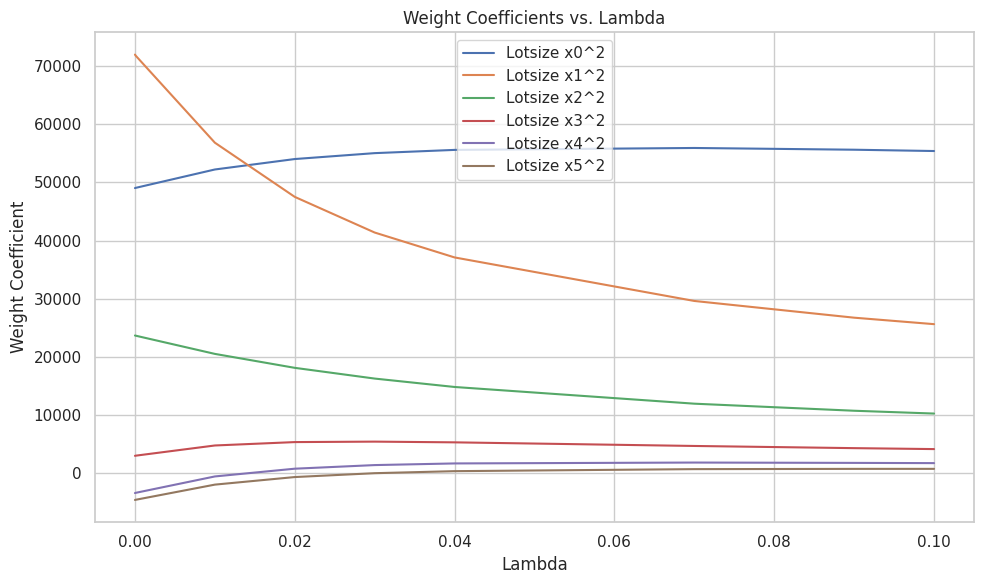

In [206]:
import matplotlib.pyplot as plt

# Transpose the weights_matrix so that each row corresponds to a weight
weights_matrix_T = weights_matrix.T

# Plot each weight against the lambda values
plt.figure(figsize=(10, 6))
for i in range(weights_matrix_T.shape[0]):
    plt.plot(lambda_range, weights_matrix_T[i], label=f'Lotsize x{i}^2')

print(lambda_range)
# Add labels and title
plt.xlabel('Lambda')
plt.ylabel('Weight Coefficient')
plt.title('Weight Coefficients vs. Lambda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [207]:

weights_matrix[0] #is lambda at zero which is without regularization

for i in range(1,10):


  #y_cap_with_l1_regularization = weights_matrix[0]
  rmse_predict_without_l2_regularization , y_cap_without_l2_regularization = predict(X_test, y_test.values.reshape(-1, 1), weights_matrix[0])

  rmse_predict_with_l2_regularization , y_cap_with_l2_regularization = predict(X_test, y_test.values.reshape(-1, 1), weights_matrix[i])

  print("for lambda value ", lambda_range[i], "has rmse difference between without l2 and with l2 regularization is",rmse_predict_without_l2_regularization - rmse_predict_with_l2_regularization , rmse_predict_without_l2_regularization , rmse_predict_with_l2_regularization)

for lambda value  1e-05 has rmse difference between without l2 and with l2 regularization is 1.3316409244289389 32842.65951330645 32841.32787238202
for lambda value  0.0001 has rmse difference between without l2 and with l2 regularization is 13.280937739444198 32842.65951330645 32829.378575567
for lambda value  0.01 has rmse difference between without l2 and with l2 regularization is 1015.9791346958482 32842.65951330645 31826.6803786106
for lambda value  0.02 has rmse difference between without l2 and with l2 regularization is 1616.0555697830168 32842.65951330645 31226.60394352343
for lambda value  0.03 has rmse difference between without l2 and with l2 regularization is 1987.5881282761948 32842.65951330645 30855.071385030253
for lambda value  0.04 has rmse difference between without l2 and with l2 regularization is 2222.4051654602263 32842.65951330645 30620.25434784622
for lambda value  0.07 has rmse difference between without l2 and with l2 regularization is 2498.826948230322 32842.6

In [208]:
#optimal lambda is 0.01 to 0.04=7
#0.07 is at index 7 in the weights
optimal_weights = weights_matrix[7]
#y_cap_with_l1_regularization = weights_matrix[6]
rmse_predict_without_l2_regularization , y_cap_without_l2_regularization = predict(X_test, y_test.values.reshape(-1, 1), weights_matrix[0])


#y_cap_with_l2_regularization = weights_matrix[40]
#choose optimal lambda value from above graph and test it on
rmse_predict_with_l2_regularization , y_cap_with_l2_regularization = predict(X_test, y_test.values.reshape(-1, 1), weights_matrix[7])


print("optimal weights with optimal lambda 0.07 in l2 regularization: ", optimal_weights)
print("RMSE score of train data without optimum l2 lambda: ",rmse[0][-1])
print("RMSE score of train data with optimum l2 lambda: ",rmse[7][-1])
print("RMSE score of test data without optimum l2 lambda : ", rmse_predict_without_l2_regularization)
print("RMSE score of test data with optimum l2 lambda: ",rmse_predict_with_l2_regularization)

optimal weights with optimal lambda 0.07 in l2 regularization:  [55933.84860596 29612.60582327 11939.15762601  4664.35543559
  1810.25758008   677.88689113]
RMSE score of train data without optimum l2 lambda:  21800.677408315838
RMSE score of train data with optimum l2 lambda:  23556.044499079366
RMSE score of test data without optimum l2 lambda :  32842.65951330645
RMSE score of test data with optimum l2 lambda:  30343.832565076125


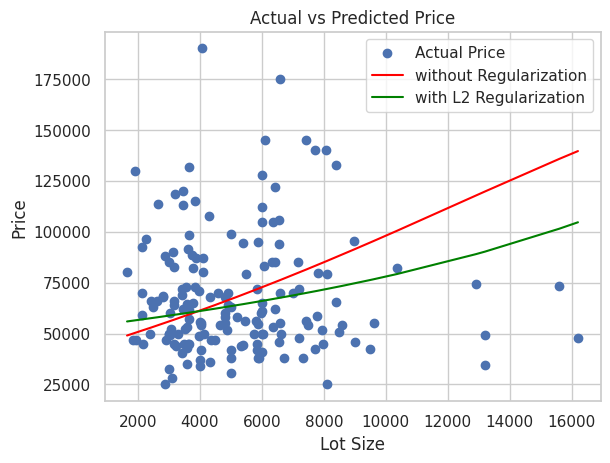

In [209]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Use sns style
sns.set(style="whitegrid")

# Calculate predicted values
plt.scatter(X_test,  y_test, label='Actual Price')
plt.scatter(X_test, y_cap_without_l2_regularization, color='red', label='without Regularization')
plt.scatter(X_test, y_cap_with_l2_regularization, color='green', label='with L2 Regularization')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()

# Show the plot
plt.show()
'''

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use sns style
sns.set(style="whitegrid")
mini = df['lotsize'].min()
maxi = df['lotsize'].max()

X_test_original = X_test * (maxi - mini) + mini

# Sort the predictions based on y_cap_with_l2_regularization
sorted_indices = np.argsort(y_cap_with_l2_regularization[:])

# Sort X_test and predictions
X_test_sorted = X_test_original[sorted_indices]
y_cap_without_l2_regularization_sorted = y_cap_without_l2_regularization[sorted_indices]
y_cap_with_l2_regularization_sorted = y_cap_with_l2_regularization[sorted_indices]

# Plot the sorted data
plt.scatter(X_test_sorted,  y_test, label='Actual Price')
plt.plot(X_test_sorted, y_cap_without_l2_regularization_sorted, color='red', label='without Regularization')
plt.plot(X_test_sorted, y_cap_with_l2_regularization_sorted, color='green', label='with L2 Regularization')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()

# Show the plot
plt.show()


##L1 Regularization

In [210]:
#with l1 regularization

def initialization_l1(X,y):
  #only for xtrain and ytrain
  X_with_bias_poly = np.c_[np.ones((X.shape[0], 1)), X, X**2, X**3,X**4,X**5]
  weights_poly = np.random.rand(1, X_with_bias_poly.shape[1])
  return X_with_bias_poly, weights_poly

def train_test_split_l1(X,y):
  X_train, X_test, y_train, y_test = sklearn_train_test(X, y, train_size=0.7, random_state=42)
  return X_train, X_test, y_train, y_test

def gradient_descent_with_poly_l1(X,y, weights,Lambda, alpha = 0.005, max_iterations = 10000):

  rmse = []

  prev_cost = math.inf
  for i in range(max_iterations):

    y_cap = X.dot(weights.T)
    cost = np.sqrt(np.mean((y_cap - y) ** 2))
    rmse.append(np.sqrt(np.mean((y_cap - y) ** 2)))
    if abs(prev_cost - cost) < 1e-4:
      #print("convergence reached. breaking out of loop")
      break

    #m = len of samples

    m = X.shape[0]
    #print('Lambda, weights',Lambda, weights)
    delta_weights = (2/m)*((y_cap-y).T.dot(X)) + Lambda * np.where(weights > 0, 1, -1)
    #alpha = 0.01 #learing rate
    #print('delta_weights',delta_weights)
    weights = weights - alpha*delta_weights
    prev_cost = cost

  return weights ,rmse

def predict_l1(X_test,y_test, optimal_weights):
  #here the weights are taken of optimal lambda value
  #x is turned into a matrix

  X_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test, X_test**2, X_test**3,X_test**4,X_test**5]
  y_cap = X_with_bias.dot(optimal_weights.T)
  rmse = np.sqrt(np.mean((y_cap - y_test) ** 2))
  return rmse, y_cap




def fit_different_lambdas_l1(X_with_bias_poly,y_train,weights_poly):
  lambda_range = [0,0.1,0.5,1,5,10,100,1000, 2000,3000, 4000,5000, 10000]
  #lambda_range = [0,0.00001,0.0001,0.01,0.02,0.03,0.04,0.07,0.09,0.1]
  rmse = []
  weights = []
  for Lambda in lambda_range:
    optimal_weights , temp_rmse = gradient_descent_with_poly_l1(X_with_bias_poly,y_train, weights_poly, Lambda)
    rmse.append(temp_rmse)
    weights.append(optimal_weights)
  return weights, rmse, lambda_range




In [211]:
#l2 only with lotsize so have to drop all others
X_lotsize = X['lotsize'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split_l1(X_lotsize,y)
X_with_bias_poly, weights_poly = initialization_l1(X_train,y_train)
print(X_with_bias_poly.shape, weights_poly.shape)
weights, rmse , lambda_range = fit_different_lambdas_l1(X_with_bias_poly,y_train.values.reshape(-1, 1),weights_poly)






plt.figure(figsize=(10, 6))

for i in range(0,len(lambda_range)):
  print("lambda value",lambda_range[i]," and RMSE with train data",rmse[i][-1])



(382, 6) (1, 6)
lambda value 0  and RMSE with train data 21800.68653360073
lambda value 0.1  and RMSE with train data 21800.669433673324
lambda value 0.5  and RMSE with train data 21800.601662789602
lambda value 1  and RMSE with train data 21800.51836638181
lambda value 5  and RMSE with train data 21799.907870758863
lambda value 10  and RMSE with train data 21799.280736496356
lambda value 100  and RMSE with train data 21807.91107566502
lambda value 1000  and RMSE with train data 22048.99631662461
lambda value 2000  and RMSE with train data 23020.44874773266
lambda value 3000  and RMSE with train data 23662.0518569543
lambda value 4000  and RMSE with train data 24340.019060878236
lambda value 5000  and RMSE with train data 25515.28114404435
lambda value 10000  and RMSE with train data 26012.41671539853


<Figure size 1000x600 with 0 Axes>

[0, 0.1, 0.5, 1, 5, 10, 100, 1000, 2000, 3000, 4000, 5000, 10000]


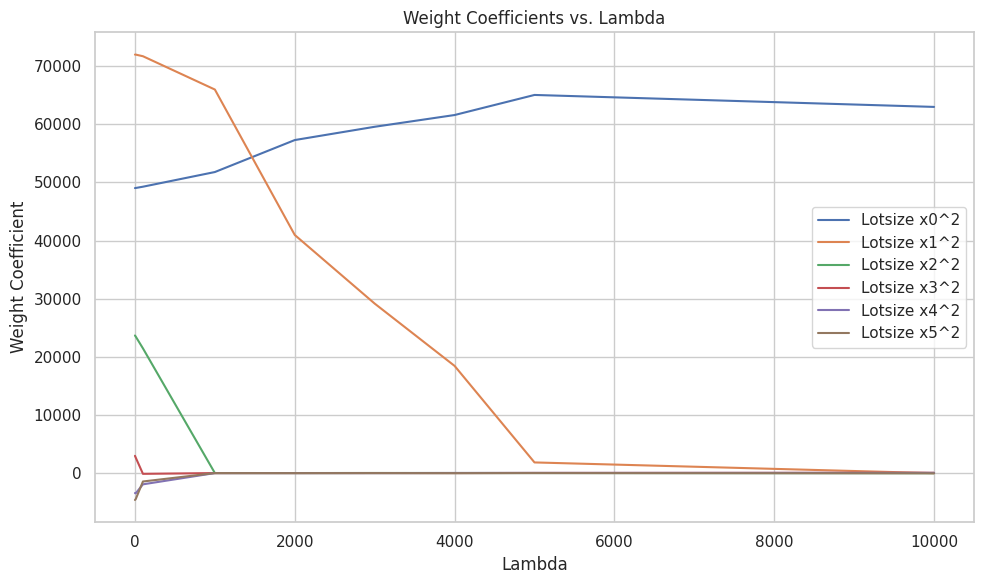

In [212]:


weights_matrix = np.vstack(weights)
weights_matrix.T.shape

import matplotlib.pyplot as plt

# Transpose the weights_matrix so that each row corresponds to a weight
weights_matrix_T = weights_matrix.T

# Plot each weight against the lambda values
plt.figure(figsize=(10, 6))
for i in range(weights_matrix_T.shape[0]):
    plt.plot(lambda_range, weights_matrix_T[i], label=f'Lotsize x{i}^2')

print(lambda_range)
# Add labels and title
plt.xlabel('Lambda')
plt.ylabel('Weight Coefficient')
plt.title('Weight Coefficients vs. Lambda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [213]:

weights_matrix[0] #is lambda at zero which is without regularization

for i in range(1,len(lambda_range)):


  #y_cap_with_l1_regularization = weights_matrix[0]
  rmse_predict_without_l1_regularization , y_cap_without_l1_regularization = predict_l1(X_test, y_test.values.reshape(-1, 1), weights_matrix[0])

  rmse_predict_with_l1_regularization , y_cap_with_l1_regularization = predict_l1(X_test, y_test.values.reshape(-1, 1), weights_matrix[i])

  print("for lambda value ", lambda_range[i], "has rmse difference between without l1 and with l1 regularization is",rmse_predict_without_l1_regularization - rmse_predict_with_l1_regularization , rmse_predict_without_l1_regularization , rmse_predict_with_l1_regularization)




for lambda value  0.1 has rmse difference between without l1 and with l1 regularization is 0.24580032643279992 32842.67771731522 32842.43191698879
for lambda value  0.5 has rmse difference between without l1 and with l1 regularization is 1.2260538262562477 32842.67771731522 32841.451663488966
for lambda value  1 has rmse difference between without l1 and with l1 regularization is 2.4447407046172884 32842.67771731522 32840.232976610605
for lambda value  5 has rmse difference between without l1 and with l1 regularization is 11.93442405195674 32842.67771731522 32830.743293263266
for lambda value  10 has rmse difference between without l1 and with l1 regularization is 23.17146589722688 32842.67771731522 32819.506251417995
for lambda value  100 has rmse difference between without l1 and with l1 regularization is 135.7054350727267 32842.67771731522 32706.972282242496
for lambda value  1000 has rmse difference between without l1 and with l1 regularization is 1563.6722228657782 32842.677717315

In [214]:

#optimal lambda is 0.5 to 1000
#0.07 is at index 7 in the weights
optimal_weights = weights_matrix[9]
#y_cap_with_l1_regularization = weights_matrix[6]
rmse_predict_without_l1_regularization , y_cap_without_l1_regularization = predict_l1(X_test, y_test.values.reshape(-1, 1), weights_matrix[0])


#y_cap_with_l2_regularization = weights_matrix[40]
#choose optimal lambda value from above graph and test it on
rmse_predict_with_l1_regularization , y_cap_with_l1_regularization = predict_l1(X_test, y_test.values.reshape(-1, 1), weights_matrix[9])


print("optimal weights with optimal lambda 4000 in l1 regularization: ", optimal_weights)

print("RMSE score of train data without optimum lambda : ",rmse[0][-1])
print("RMSE score of train data with optimum lambda: ",rmse[9][-1])
print("RMSE score of test data without optimum lambda: ", rmse_predict_without_l1_regularization)
print("RMSE score of test data with optimum lambda : ",rmse_predict_with_l1_regularization)





optimal weights with optimal lambda 4000 in l1 regularization:  [ 5.95812759e+04  2.91608577e+04  1.45355366e+01  8.23913995e+00
  1.56789413e-01 -8.10614372e-01]
RMSE score of train data without optimum lambda :  21800.68653360073
RMSE score of train data with optimum lambda:  23662.0518569543
RMSE score of test data without optimum lambda:  32842.67771731522
RMSE score of test data with optimum lambda :  29651.017605934507


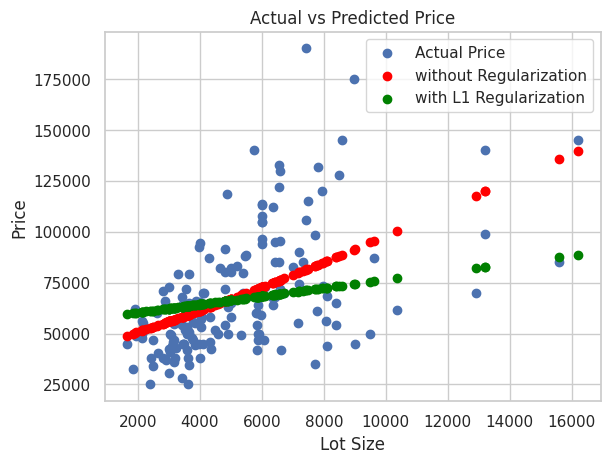

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use sns style
sns.set(style="whitegrid")
mini = df['lotsize'].min()
maxi = df['lotsize'].max()

X_test_original = X_test * (maxi - mini) + mini

plt.scatter(X_test_original,  y_test, label='Actual Price')
plt.scatter(X_test_original, y_cap_without_l1_regularization, color='red', label='without Regularization')
plt.scatter(X_test_original, y_cap_with_l1_regularization, color='green', label='with L1 Regularization')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()

# Show the plot
plt.show()

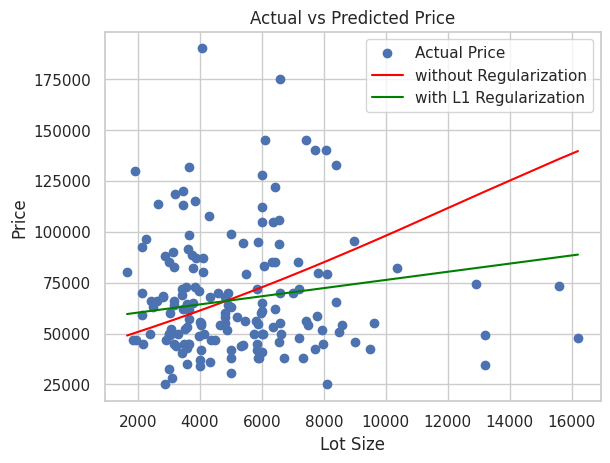

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use sns style
sns.set(style="whitegrid")

sorted_indices = np.argsort(y_cap_with_l1_regularization[:])

X_test_sorted = X_test_original[sorted_indices]
y_cap_without_l1_regularization_sorted = y_cap_without_l1_regularization[sorted_indices]
y_cap_with_l1_regularization_sorted = y_cap_with_l1_regularization[sorted_indices]

# Plot the sorted data
plt.scatter(X_test_sorted,  y_test, label='Actual Price')
plt.plot(X_test_sorted, y_cap_without_l1_regularization_sorted, color='red', label='without Regularization')
plt.plot(X_test_sorted, y_cap_with_l1_regularization_sorted, color='green', label='with L1 Regularization')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()

# Show the plot
plt.show()
